**Idée de problématique** : on propose un essai sur deux hotels :

on va leur développer un modèle qui prédit si le client qui effectue une réservation est susceptible de faire une annulation.
Le but de cet outil est de proposer à l'hotel "d'adapter ses tarifs" .

en gros si le client est susceptible de faire une annulation, on va lui imposer le tarif "non remboursable / partiellement remboursable".

et si le client est susceptible de ne pas faire d'annulation, on va lui proposer le tarif "remboursable". comme ça l'hotel fera moins de perte car les anulations de dernière minute sont très loudrdes financièrement. 

colonne dposit contient si c'est remboursable ou pas 

hotel: The type of hotel, either "City Hotel" or "Resort Hotel.", resort = vacances

is_canceled: Binary value indicating whether the booking was cancelled (1) or not (0).

lead_time: Number of days between booking and arrival.

arrival_date_year: Year of arrival date.

arrival_date_month: Month of arrival date.

arrival_date_week_number: Week number of arrival date.

arrival_date_day_of_month: Day of the month of arrival date.

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stays.

stays_in_week_nights: Number of weekday nights (Monday to Friday) the guest stays.

adults: Number of adults.

children: Number of children.

babies: Number of babies.

meal: Type of meal booked.

country: Country of origin.

market_segment: Market segment designation.

distribution_channel: Booking distribution channel.

is_repeated_guest: Binary value indicating whether the guest is a repeated guest (1) or not (0).

previous_cancellations: Number of previous booking cancellations.

previous_bookings_not_canceled: Number of previous bookings not cancelled.

reserved_room_type: Code of room type reserved.

assigned_room_type: Code of room type assigned at check-in.

booking_changes: Number of changes/amendments made to the booking.

deposit_type: Type of deposit made.

agent: ID of the travel agency.

company: ID of the company.

days_in_waiting_list: Number of days in the waiting list before booking.

customer_type: Type of booking.

adr: Average daily rate. combien gagne l'hotel, pour la journée donnée, par chambre

required_car_parking_spaces: Number of car parking spaces required.

total_of_special_requests: Number of special requests made.

reservation_status: Reservation last status.

reservation_status_date: Date of the last status.

name: Guest's name. (Not Real)

email: Guest's email address.(Not Real)

phone-number: Guest's phone number. (Not Real)

credit_card: Guest's credit card details. (Not Real)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib as plt
from fct import *

In [3]:
df = pd.read_csv("../hotel_bookings.csv", sep=",")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Cleaning

### NaN and select columns

In [4]:
colonne_a_garder = ["hotel", "is_canceled", "lead_time", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "meal", "country", "market_segment", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "reserved_room_type", "assigned_room_type", "booking_changes", "deposit_type", "days_in_waiting_list", "customer_type", "adr", "required_car_parking_spaces", "total_of_special_requests"]
df = df[colonne_a_garder]
df.dropna(inplace=True)
df.drop_duplicates(subset=colonne_a_garder, inplace=True)
print(df.isnull().sum())




hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_24877/4157271603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_24877/4157271603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=colonne_a_garder, inplace=True)


## type of columns (date, ...)

In [5]:
df['arrival_date_month'] = pd.to_datetime(df.arrival_date_month, format='%B', errors='coerce').dt.month
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))
df.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'], axis=1, inplace=True)
print(df)

/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_24877/2894240059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date_month'] = pd.to_datetime(df.arrival_date_month, format='%B', errors='coerce').dt.month


               hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0       Resort Hotel            0        342                        0   
1       Resort Hotel            0        737                        0   
2       Resort Hotel            0          7                        0   
3       Resort Hotel            0         13                        0   
4       Resort Hotel            0         14                        0   
...              ...          ...        ...                      ...   
119385    City Hotel            0         23                        2   
119386    City Hotel            0        102                        2   
119387    City Hotel            0         34                        2   
119388    City Hotel            0        109                        2   
119389    City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
0                          0       2       0.0 

/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_24877/2894240059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date'] = pd.to_datetime(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))
/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_24877/2894240059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'], axis=1, inplace=True)


## nettoyage données valeurs aberrantes (var quanti), modalité seule (var quali)

In [6]:
columns_to_filter_quanti = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces"]
columns_to_filter_quali = ["reserved_room_type", "assigned_room_type"]

# Filter variables quanti
for column in columns_to_filter_quanti:
    df = filter_occurence_variable(df, column, 10)

# Filter variables quali
for column in columns_to_filter_quali:
    df = filter_occurence_variable(df, column, 10)

df = df[df['meal'] != "Undefined"]

## binary to categorielle

In [7]:
# columns_binary = ["is_canceled", "is_repeated_guest"]

# for column in columns_binary:
#     df[column] = df[column].astype('category')

# print(df["is_canceled"].info())

## Encodage One-hot pour algo machine learning

In [8]:
col_quali = ["hotel", "meal", "market_segment", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]
df_encoded = pd.get_dummies(df, columns=col_quali, dtype=int)
df_encoded.drop(['country', "arrival_date"], axis=1, inplace=True)
for col in df_encoded.columns:
    if df_encoded[col].dtype != "float64":
        df_encoded[col] = df_encoded[col].astype('int64')

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68439 entries, 0 to 119389
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     68439 non-null  int64  
 1   lead_time                       68439 non-null  int64  
 2   stays_in_weekend_nights         68439 non-null  int64  
 3   stays_in_week_nights            68439 non-null  int64  
 4   adults                          68439 non-null  int64  
 5   children                        68439 non-null  float64
 6   babies                          68439 non-null  int64  
 7   is_repeated_guest               68439 non-null  int64  
 8   previous_cancellations          68439 non-null  int64  
 9   previous_bookings_not_canceled  68439 non-null  int64  
 10  booking_changes                 68439 non-null  int64  
 11  days_in_waiting_list            68439 non-null  int64  
 12  adr                            

**Analsye exploratoire des données**

In [9]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-01
6,Resort Hotel,0,0,0,2,2,0.0,0,BB,PRT,...,C,C,0,No Deposit,0,Transient,107.0,0,0,2015-07-01


<Axes: xlabel='hotel', ylabel='count'>

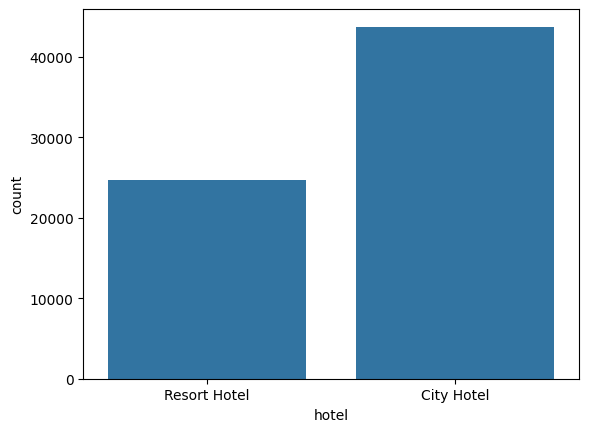

In [10]:
#barplot hotel type distribution avec les barres de couleurs diffrentes:
import seaborn as sns
sns.countplot(x='hotel', data=df)


In [11]:
#afficher les prix en fonction du type d'hotel et du temps
import plotly.express as px
import pandas as pd


# crée le prix moyen par mois par hotel
df['month'] = df['arrival_date'].dt.strftime('%m')
df['month'] = df['month'].astype(int)
final_prices = df.groupby(['month', 'hotel'])['adr'].mean().reset_index()
final_prices
# fais la courbe
fig = px.line(final_prices, x = 'month', y = 'adr', color = 'hotel',
            title = 'Prix ​​de la chambre par nuit au cours des mois')
fig.show()





In [12]:
#graphique et plot pour naalyser les données et les modalités:
#nombre d'annulations pour chaque hotel pour chaque mois
# crée le prix moyen par mois par hotel
df['month'] = df['arrival_date'].dt.strftime('%m')
df['month'] = df['month'].astype(int)
final_canceled = df.groupby(['month', 'hotel'])['is_canceled'].sum().reset_index()
final_canceled
# fais la courbe
fig = px.line(final_canceled, x = 'month', y = 'is_canceled', color = 'hotel',
            title = 'Nombre d"annulation')
fig.show()

In [13]:
#nombre de réservations par mois
df['nb_people'] = df['adults']+df['children']+df['babies']
nb_people = df.groupby(['month', 'hotel'])['nb_people'].sum().reset_index()
nb_people
# fais la courbe
fig = px.line(nb_people, x = 'month', y = 'nb_people', color = 'hotel',
            title = 'Nombre de réservations par mois')
fig.show()

In [14]:
#je voudrais pouvoir faire un bar plot avec le nombre d'annulation par rapport au nombre de réservation. pour chaque mois pour chaque hotel

df['arrival_date_month'] = df['arrival_date'].dt.strftime('%m')
df['arrival_date_month'] = df['month'].astype(int)

import plotly.express as px

# Grouper par 'arrival_date_month' et 'hotel', puis calculer le nombre total de réservations et le nombre d'annulations
df_grouped = df.groupby(['arrival_date_month', 'hotel']).agg(total_reservations=('is_canceled', 'count'), cancellations=('is_canceled', 'sum')).reset_index()

# Créer une nouvelle colonne 'cancellation_rate' qui est le ratio du nombre d'annulations sur le nombre total de réservations
df_grouped['cancellation_rate'] = df_grouped['cancellations'] / df_grouped['total_reservations']

# Créer un graphique à barres avec 'arrival_date_month' sur l'axe des x, 'cancellation_rate' sur l'axe des y, et les barres colorées en fonction du type d'hôtel
fig = px.bar(df_grouped, x='arrival_date_month', y='cancellation_rate', color='hotel', barmode='group', title='Taux d\'annulation par mois pour chaque hôtel')
fig.show()
fig = px.line(df_grouped, x='arrival_date_month', y='cancellation_rate', color='hotel',  title='Taux d\'annulation par mois pour chaque hôtel')
fig.show()

**Corrélation entre les variables et la variable cible : is_canceled**

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency



# Tableau de contingence
# contingency_table = pd.crosstab(df['is_canceled'].astype("str"), df['reserved_room_type'])
# Je veux faire le test du chi 2 pour toutes les variables catégorielles, c'est à dire celles de type str
import pandas as pd
from scipy.stats import chi2_contingency
df_cat = df.select_dtypes(include='object')
for col in df_cat.columns:
    # Créer un tableau de contingence
    contingency_table = pd.crosstab(df[col], df['is_canceled'])

    # Effectuer le test du chi-deux
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Afficher les résultats
    print('Variable :', col)
    print('Chi-deux :', chi2)
    print('p-valeur :', p)
    print('Degrés de liberté :', dof)
    print('Tableau de contingence attendu :')
    print(expected)
    print('\n')


contingency_table = pd.crosstab(df['is_canceled'], df['reserved_room_type'])

# Test du Chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, p-value: {p}")


Variable : hotel
Chi-deux : 262.1520397700931
p-valeur : 5.82680055451963e-59
Degrés de liberté : 1
Tableau de contingence attendu :
[[31618.28659098 12155.71340902]
 [17815.71340902  6849.28659098]]


Variable : meal
Chi-deux : 350.47962238765564
p-valeur : 1.1744169738906695e-75
Degrés de liberté : 3
Tableau de contingence attendu :
[[39289.19177662 15104.80822338]
 [  143.7391838     55.2608162 ]
 [ 4111.37404112  1580.62595888]
 [ 5889.69499847  2264.30500153]]


Variable : country
Chi-deux : 1800.7858624610103
p-valeur : 4.557295164583518e-270
Degrés de liberté : 170
Tableau de contingence attendu :
[[7.22307456e-01 2.77692544e-01]
 [1.71186867e+02 6.58131329e+01]
 [7.22307456e-01 2.77692544e-01]
 [6.50076711e+00 2.49923289e+00]
 [3.61153728e+00 1.38846272e+00]
 [2.67253759e+01 1.02746241e+01]
 [1.06901504e+02 4.10984965e+01]
 [2.88922983e+00 1.11077017e+00]
 [7.22307456e-01 2.77692544e-01]
 [1.44461491e+00 5.55385087e-01]
 [7.22307456e-01 2.77692544e-01]
 [2.15247622e+02 8.275237

In [21]:
#prediction de la variable is_canceled
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#séparer les variables explicatives de la variable à prédire
X = df_encoded.drop('is_canceled', axis = 1)
y = df_encoded['is_canceled']

#séparer les données en données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#instancier le modèle
log_reg = LogisticRegression()

#entrainer le modèle
log_reg.fit(X_train, y_train)

#faire une prédiction sur les données de test
y_pred = log_reg.predict(X_test)

#afficher la matrice de confusion
confusion_matrix(y_test, y_pred)

#afficher le rapport de classification
print(classification_report(y_test, y_pred))

#afficher le score de précision
print(accuracy_score(y_test, y_pred))

#afficher les coefficients de la régression logistique
log_reg.coef_

#afficher les variables les plus importantes
importance = log_reg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
#afficher les variables les plus importantes sous forme de graphique
plt.bar([x for x in range(len(importance))], importance)

#afficher les variables les plus importantes sous forme de graphique
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#afficher les vrais négatifs, les vrais positifs, faux négatifs et les faux positifs
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)
#affiche sous force de matrice de confusion
confusion_matrix(y_test, y_pred)

# Générer la matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_mat)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Afficher graphiquement la matrice de confusion


cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

plt.show()


              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9827
           1       0.69      0.42      0.52      3861

    accuracy                           0.78     13688
   macro avg       0.75      0.67      0.69     13688
weighted avg       0.77      0.78      0.76     13688

0.7835330216247808
Feature: 0, Score: 0.00588
Feature: 1, Score: -0.01464
Feature: 2, Score: 0.09506
Feature: 3, Score: -0.01870
Feature: 4, Score: 0.07784
Feature: 5, Score: 0.02632
Feature: 6, Score: -0.16713
Feature: 7, Score: 0.79334
Feature: 8, Score: -0.20405
Feature: 9, Score: -0.34201
Feature: 10, Score: 0.01542
Feature: 11, Score: 0.00626
Feature: 12, Score: -1.46688
Feature: 13, Score: -0.76470
Feature: 14, Score: -0.44767
Feature: 15, Score: -0.15791
Feature: 16, Score: -0.15950
Feature: 17, Score: 0.01368
Feature: 18, Score: -0.20786
Feature: 19, Score: -0.25190
Feature: 20, Score: -0.02020
Feature: 21, Score: 0.00927
Feature: 22, Score: -0.11025
Featur

/Users/augustinhannebert/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



AttributeError: module 'matplotlib' has no attribute 'bar'